In [89]:
import warnings
warnings.filterwarnings('ignore')

# data imports
import pandas as pd
import numpy as np
from plotnine import *

# modeling imports
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error #model evaluation
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
# Z, One hot, Stand sclr
from sklearn.preprocessing import StandardScaler, OneHotEncoder #Z-score variables
#poly import
from sklearn.preprocessing import PolynomialFeatures
# pipeline imports
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer

%matplotlib inline


In [90]:
ama = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/boutique.csv")

ama.head()



,year,gender,age,height_cm,waist_size_cm,inseam_cm,test_group,salary_self_report_in_k,months_active,num_purchases,amount_spent_annual
0,2020,woman,34.0,168,98,75.0,0,69.83,21,89,729.73
1,2020,man,28.0,168,88,76.0,0,61.39,7,32,621.73
2,2021,woman,18.0,170,95,75.0,0,80.55,2,25,820.82
3,2021,woman,43.0,167,97,75.0,0,82.98,4,89,880.33
4,2021,other,29.0,173,89,74.0,0,62.00,5,95,690.35


In [91]:
#Check Null
ama.isnull().sum()

year                         0
gender                       0
age                         20
height_cm                    0
waist_size_cm                0
inseam_cm                  200
test_group                   0
salary_self_report_in_k     15
months_active                0
num_purchases                0
amount_spent_annual          0
dtype: int64

In [92]:
#Drop Missing

ama.dropna(inplace = True)
ama.reset_index(inplace = True)

In [93]:
predictors = ["age", "height_cm", "waist_size_cm", "inseam_cm", "test_group", "salary_self_report_in_k", "months_active", "num_purchases", "gender"]
contin = ["age", "height_cm", "waist_size_cm", "inseam_cm", "test_group", "salary_self_report_in_k", "months_active", "num_purchases"]


In [94]:
X = ama[predictors]
y = ama["amount_spent_annual"]

In [95]:
#X = pd.get_dummies(data=X, drop_first=True)

In [96]:
drop_first=True

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y, test_size = 0.2)

In [135]:
#Zscore _------__- ----__--

preprocess = make_column_transformer((StandardScaler(), contin),
                            (OneHotEncoder(), ["gender"]),
                            remainder = "passthrough")

In [136]:
lr = LinearRegression()

lr2 = LinearRegression()

pipe2 = Pipeline([("zscore", preprocess),
                ("poly", PolynomialFeatures(degree = 2)),
               ("linearregression", lr2)])


pipe = Pipeline([("pre", preprocess),
         ("linearregression", lr)])

Train MSE :  15438.348038852017
Train MAE :  98.18876419522536
Train MAPE:  15438.348038852017
Train R2  :  0.430579278748477
Test MSE :  15147.04055045418
Test MAE  :  96.86252523213564
Test MAPE :  15147.04055045418
Train Poly MSE :  5541.197913601471
Train Poly MAE :  59.825899094029175
Train Poly MAPE:  5541.197913601471
Train Poly R2  :  0.7966808675876813
Test Poly MSE :  5473.045060325305
Test Poly MAE  :  59.587634991925704
Test Poly MAPE :  5473.045060325305


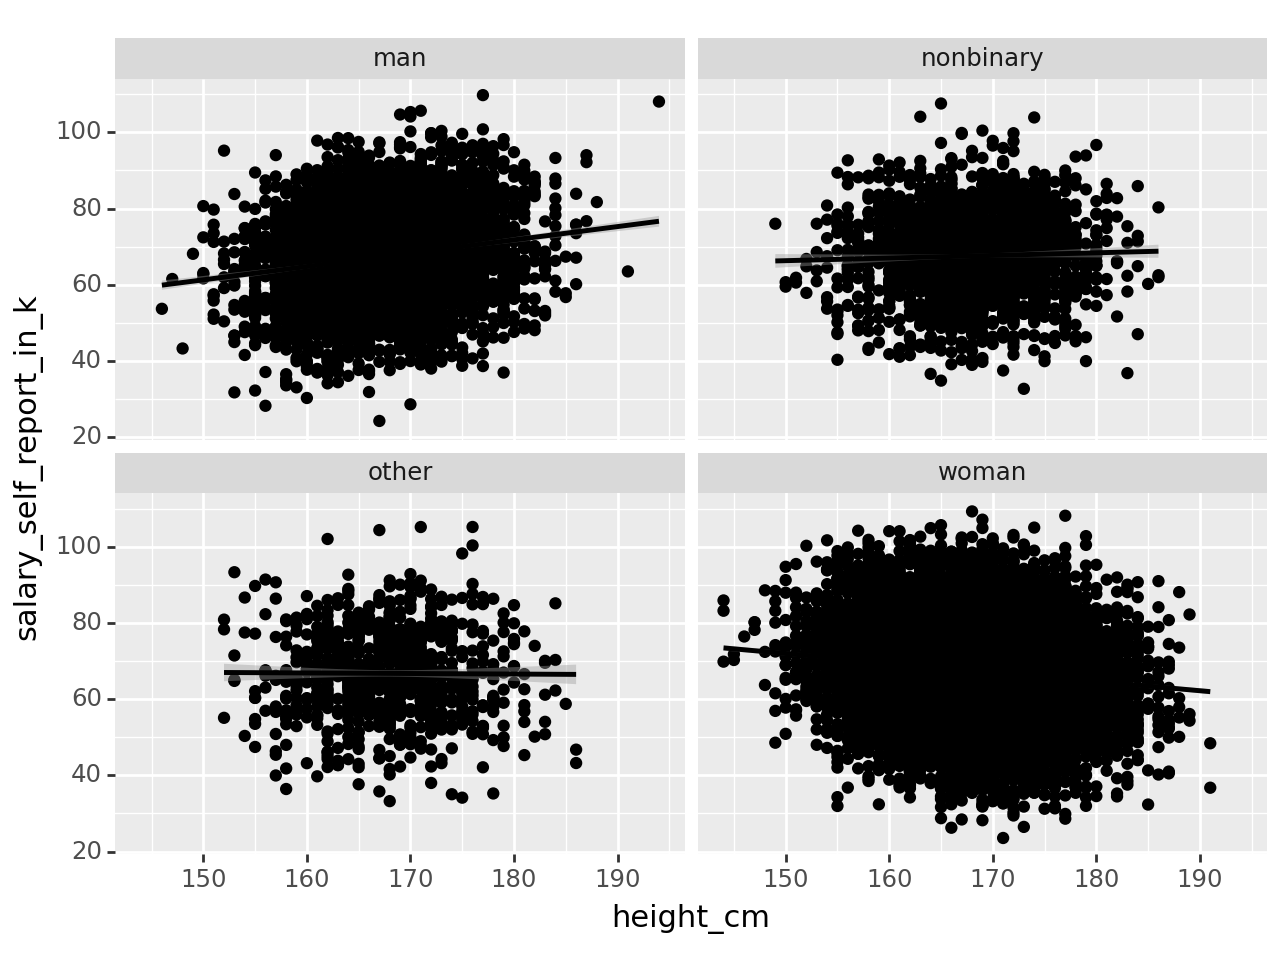

<Figure Size: (640 x 480)>

In [185]:
# fit
pipe.fit(X_train,y_train)

# predict
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)



# assess
print("Train MSE : ", mean_squared_error(y_train,y_pred_train))
print("Train MAE : ", mean_absolute_error(y_train,y_pred_train))
print("Train MAPE: ", mean_squared_error(y_train,y_pred_train))
print("Train R2  : ", r2_score(y_train,y_pred_train))

print("Test MSE : ", mean_squared_error(y_test,y_pred_test))
print("Test MAE  : ", mean_absolute_error(y_test,y_pred_test))
print("Test MAPE : ", mean_squared_error(y_test,y_pred_test))

#Fit new poly
pipe2.fit(X_train, y_train)


# predict 

y_pred_train2 = pipe2.predict(X_train2)
y_pred_test2 = pipe2.predict(X_test2)

#### pipe 2 assess
print("Train Poly MSE : ", mean_squared_error(y_train2,y_pred_train2))
print("Train Poly MAE : ", mean_absolute_error(y_train2,y_pred_train2))
print("Train Poly MAPE: ", mean_squared_error(y_train2,y_pred_train2))
print("Train Poly R2  : ", r2_score(y_train2,y_pred_train2))

print("Test Poly MSE : ", mean_squared_error(y_test2,y_pred_test2))
print("Test Poly MAE  : ", mean_absolute_error(y_test2,y_pred_test2))
print("Test Poly MAPE : ", mean_squared_error(y_test2,y_pred_test2))

##ggplot(ama, aes(x = "factor(test_group)", y = "amount_spent_annual", ))+ geom_boxplot() + facet_wrap("~gender")


ggplot(ama, aes(x = "height_cm", y = "salary_self_report_in_k", ))+ geom_point() + geom_smooth(method = "lm", se = "FALSE")+ facet_wrap("~gender") + scale_size_continuous(range = (.25, .50))

